In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
Krause_stocks <- read.csv("../41467_2025_59204_MOESM4_ESM/Supplementary Software/stocks.csv" , fileEncoding="latin1") |>
                 dplyr::rename(Article.ID = `ï..Article.ID`)
Krause_stocks_cols <- dput(colnames(Krause_stocks))

c("Article.ID", "Publication.year", "Study.site", "Country", 
"Latitude", "Longitude", "Coastal.typology", "Marine.ecoregion", 
"Seagrass.bioregion", "Seagrass.functionalmorphological.group", 
"Seagrass.species", "Seagrass.genus", "Additional.identification", 
"Above.ground.biomass", "Below.ground.biomass", "Total.biomass", 
"Sampling.depth", "Ctot.stock", "Ctot.content", "Corg.stock", 
"Corg.content", "Cinorg.stock", "Cinorg.content", "Ctot.stock.15cm", 
"Corg.stock.15cm", "Cinorg.stock.15cm", "Ctot.stock.30cm", "Corg.stock.30cm", 
"Cinorg.stock.30cm", "Ctot.stock.50cm", "Corg.stock.50cm", "Cinorg.stock.50cm", 
"Ctot.stock.100cm", "Corg.stock.100cm", "Cinorg.stock.100cm", 
"OM.content", "Porosity", "Dry.Bulk.Density", "Grain.size", "Fraction.mud", 
"Notes")


In [3]:
Krause_data <- read.csv("../41467_2025_59204_MOESM4_ESM/Supplementary Software/Core_data.csv" , fileEncoding="latin1")
Krause_data_cols <- dput(colnames(Krause_data))

c("ï..Article.ID", "Primary.reference", "Secondary.reference", 
"Publication.year", "Site.name", "Country", "Latitude", "Longitude", 
"Species", "Core.ID", "Top.of.section", "Bottom.of.section", 
"Depth.at.center.of.slice", "Thickness.sediment.slice", "Dry.Bulk.Density", 
"OM.content", "OM.density", "Corg", "Cinorg", "Cinorg.stock.increment", 
"Corg.stock.increment", "Ctot.stock.increment", "DBD.core", "OM.content.core", 
"Corg.core", "Cinorg.core", "Cinorg.stock.core", "Corg.stock.core", 
"Ctot.stock.core", "Depth.of.core", "X", "X.1", "X.2")


In [4]:
Krause_database <- read_rds("../data/Krause_database.rds") |>
                   dplyr::mutate(data_source = "Krause_et_al_2025") |>
                   dplyr::relocate(data_source)
dim(Krause_database)

[1] 2813   48

In [5]:
Krause_database |> select(where(~ !all(is.na(.)))) |> dim()

[1] 2813   48

In [6]:
zaf_data_df <- read_rds("../data/zaf_data_df.rds") 
glimpse(zaf_data_df)

Rows: 573
Columns: 13
$ data_source             <chr> "Bossert_et_al_2024", "Bossert_et_al_2024", "B…
$ study_id                <chr> "Bossert_et_al_2024", "Bossert_et_al_2024", "B…
$ site_id                 <chr> "Berg", "Berg", "Berg", "Berg", "Berg", "Berg"…
$ core_id                 <chr> "LWR_SS1_R1", "LWR_SS1_R1", "LWR_SS1_R1", "LWR…
$ depth_min               <dbl> 0, 3, 6, 10, 0, 3, 6, 10, 0, 3, 6, 10, 0, 3, 6…
$ depth_max               <dbl> 3, 6, 10, 15, 3, 6, 10, 15, 3, 6, 10, 15, 3, 6…
$ dry_bulk_density        <dbl> 1.0301527, 1.0991792, 0.8814128, 1.1093583, 0.…
$ fraction_organic_matter <dbl> 0.40, 0.25, 0.97, 0.45, 0.34, 0.69, 0.30, 0.34…
$ year                    <dbl> 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022…
$ latitude                <dbl> -32.7716, -32.7716, -32.7716, -32.7716, -32.77…
$ longitude               <dbl> 18.14287, 18.14287, 18.14287, 18.14287, 18.142…
$ species_code            <chr> "Zostera capensis", "Zostera capensis", "Zoste…
$ code_type       

In [7]:
dim(zaf_data_df)

[1] 573  13

In [8]:
dim(zaf_data_df)

[1] 573  13

In [9]:
unique(zaf_data_df$data_source)

[1] "Bossert_et_al_2024" "Machite_et_al"      "Ndhlovu_et_al"

In [10]:
#zaf_data_df

In [11]:
setdiff(names(zaf_data_df), names(Krause_stocks))

[1] "data_source"             "study_id"               
 [3] "site_id"                 "core_id"                
 [5] "depth_min"               "depth_max"              
 [7] "dry_bulk_density"        "fraction_organic_matter"
 [9] "year"                    "latitude"               
[11] "longitude"               "species_code"           
[13] "code_type"

In [180]:
(Zcapensis_depthseries <- dplyr::rename(rename(zaf_data_df, Article.ID = study_id),
                                               Study.site = site_id,
                                               Latitude = latitude,
                                               Longitude = longitude,
                                               Seagrass.species = species_code,
                                               Core.ID = core_id,
                                               Top.of.section = depth_min, 
                                               Bottom.of.section = depth_max,
                                               Dry.Bulk.Density = dry_bulk_density,
                                               Corg = fraction_organic_matter) |> 
                                 dplyr::mutate(Publication.year = str_split_fixed(Article.ID, "_", 4)[, 4],
                                     Seagrass.genus = str_split_fixed(Seagrass.species, " ", 2)[,2],
                                     Country = "South Africa",
                                     Marine.ecoregion = "Temperate Southern Africa",
                                     Seagrass.bioregion = "Temperate Southern Oceans",
                                     Coastal.typology = "Type I: Small deltas",
                                     Seagrass.functionalmorphological.group = "Group B: Intermediate (Halodule, Zostera, Heterozostera, Syringodium, Cymodocea sp.)",
                                     Coastal.typology = if_else(Study.site == "Langebaan", "Type III: Lagoons", Coastal.typology)) |>
                         dplyr::relocate(any_of(Krause_stocks_cols), .before = everything())) |>
                         dplyr::select(where(is.numeric)) |>
                         dplyr::sample_n(5)

Latitude,Longitude,Dry.Bulk.Density,Top.of.section,Bottom.of.section,Corg,year
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-32.81825,18.19599,1.2302677,6,10,0.35000000,2022
29.42223,-31.69004,1.2542200,10,20,1.64500000,2021
22.99216,-34.03369,1.4718000,10,20,0.18100000,2021
-32.81825,18.19599,0.6661589,0,3,0.24000000,2022
-33.86624,25.63304,NA,10,25,0.03112808,2018


In [45]:
 dput(colnames(Zcapensis_depthseries))

c("Article.ID", "Publication.year", "Study.site", "Country", 
"Latitude", "Longitude", "Coastal.typology", "Marine.ecoregion", 
"Seagrass.bioregion", "Seagrass.functionalmorphological.group", 
"Seagrass.species", "Seagrass.genus", "Dry.Bulk.Density", "data_source", 
"Core.ID", "Top.of.section", "Bottom.of.section", "Corg", "year", 
"code_type")


In [111]:
grouping_cols <- c("Article.ID", "Publication.year", "Study.site", "Country", 
                  "Latitude", "Longitude", "Coastal.typology", "Marine.ecoregion", 
                  "Seagrass.bioregion", "Seagrass.functionalmorphological.group", 
                  "Seagrass.species", "Seagrass.genus", "data_source", 
                  "Core.ID", "year", "code_type")

In [112]:
coredata_slices <-  Zcapensis_depthseries |>
                    dplyr::mutate(Thickness.sediment.slice = Bottom.of.section - Top.of.section,
                                  Depth.at.center.of.slice = Top.of.section + (Thickness.sediment.slice/2),
                                  depth_interval = Top.of.section + Thickness.sediment.slice,
                                  Corg_DBD = Dry.Bulk.Density * (Corg/100), 
                                  Carbon_density = Corg_DBD * Thickness.sediment.slice,
                                  Corg_DBD = Dry.Bulk.Density * (Corg/100), Corg_DBD_interval = Corg_DBD * Thickness.sediment.slice) |>
                    dplyr::group_by(across(all_of(grouping_cols))) |>
                    dplyr::mutate(cumsum_Corg_DBD = cumsum(Corg_DBD_interval),
                                  carbon_stock_MgC_ha = cumsum_Corg_DBD * (1/1000000) * (100000000/1)) |>
                        dplyr::ungroup() 

[1] 573  28

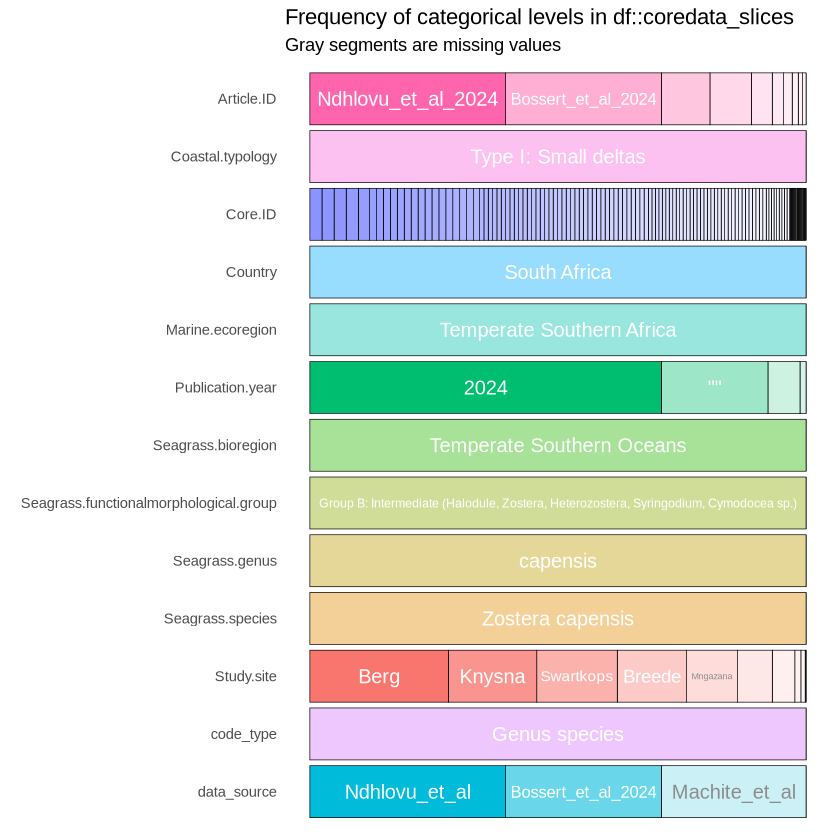

In [113]:
dim(coredata_slices)
inspectdf::inspect_cat(coredata_slices) |> inspectdf::show_plot()

In [114]:
glimpse(coredata_slices)

Rows: 573
Columns: 28
$ Article.ID                             <chr> "Bossert_et_al_2024", "Bossert_…
$ Publication.year                       <chr> "2024", "2024", "2024", "2024",…
$ Study.site                             <chr> "Berg", "Berg", "Berg", "Berg",…
$ Country                                <chr> "South Africa", "South Africa",…
$ Latitude                               <dbl> -32.7716, -32.7716, -32.7716, -…
$ Longitude                              <dbl> 18.14287, 18.14287, 18.14287, 1…
$ Coastal.typology                       <chr> "Type I: Small deltas", "Type I…
$ Marine.ecoregion                       <chr> "Temperate Southern Africa", "T…
$ Seagrass.bioregion                     <chr> "Temperate Southern Oceans", "T…
$ Seagrass.functionalmorphological.group <chr> "Group B: Intermediate (Halodul…
$ Seagrass.species                       <chr> "Zostera capensis", "Zostera ca…
$ Seagrass.genus                         <chr> "capensis", "capensis", "capens…
$ Dry.Bulk.Density

In [115]:
xtabs(~ Study.site, data = coredata_slices)

Study.site
     Berg    Breede   Kariega Keurbooms    Knysna Kobonqaba    Kromme  Mngazana 
      160        80         5         1       102         7        26        59 
 Olifants Swartkops 
       40        93 

In [216]:
interpolate_slice <- function(data, x_val) {
    
  # Return NA if x_val is NA
  if (is.na(x_val)) return(NA_real_)

  # Rename columns to standard names (assumes only two columns: x and y)
  clean_data <- data %>%
    setNames(c("x", "y")) %>%
    filter(!is.na(x) & !is.na(y))

  if (nrow(clean_data) == 0) return(NA_real_)

  if (x_val > max(clean_data$x, na.rm = TRUE)) {
    return(NA_real_)
  }

  model <- lm(y ~ x, data = clean_data)

  predict(model, newdata = data.frame(x = x_val))
}

In [217]:
colnames(coredata_slices)

[1] "Article.ID"                            
 [2] "Publication.year"                      
 [3] "Study.site"                            
 [4] "Country"                               
 [5] "Latitude"                              
 [6] "Longitude"                             
 [7] "Coastal.typology"                      
 [8] "Marine.ecoregion"                      
 [9] "Seagrass.bioregion"                    
[10] "Seagrass.functionalmorphological.group"
[11] "Seagrass.species"                      
[12] "Seagrass.genus"                        
[13] "Dry.Bulk.Density"                      
[14] "data_source"                           
[15] "Core.ID"                               
[16] "Top.of.section"                        
[17] "Bottom.of.section"                     
[18] "Corg"                                  
[19] "year"                                  
[20] "code_type"                             
[21] "Thickness.sediment.slice"              
[22] "Depth.at.center.of.slice"              
[23] "depth_interval"                        
[24] "Corg_DBD"                              
[25] "Carbon_density"                        
[26] "Corg_DBD_interval"                     
[27] "cumsum_Corg_DBD"                       
[28] "carbon_stock_MgC_ha"

In [118]:
soc_vars <- c("Corg", "Dry.Bulk.Density")
soc_depths  <- c(15, 20, 30, 50, 100)         

In [119]:
# get_slice_val <- function(data, x_col, y_col, x_val) {
#   match_row <- data[data[[x_col]] == x_val, , drop = FALSE]
#   if (nrow(match_row) == 0) return(NA_real_)
#   return(match_row[[y_col]][1])
# }

In [168]:
get_slice_val <- function(data, x_val) {

      # Ensure input is a data.frame and has at least 2 columns
      if (!is.data.frame(data) || ncol(data) < 2) return(NA_real_)
      
      x_col <- names(data)[1]
      y_col <- names(data)[2]
      
      # If either column is missing, return NA
      if (is.null(x_col) || is.null(y_col)) return(NA_real_)
      
      # Defensive: ensure x_col has non-NA entries to check
      if (!x_col %in% names(data) || !y_col %in% names(data)) return(NA_real_)
      
      # Filter for exact match
      match_row <- data[data[[x_col]] == x_val, , drop = FALSE]
      
      # Return NA if no match
      if (nrow(match_row) == 0) return(NA_real_)
      
      return(match_row[[y_col]][1])
    
}

In [169]:
slice_check <- function(data, x_val, xreal) {
    
  if (isTRUE(x_val == xreal)) {
      return(get_slice_val(data, x_val))
  } else {
     return(NA_real_)
  }
}

In [253]:
predict_val <- function(data, x_val) {

  # Return NA if x_val is NA
  if (is.na(x_val)) return(NA_real_)

  # # Rename columns to standard names (assumes only two columns: x and y)
  clean_data <- data |>
                setNames(c("x", "y")) |>
                dplyr::filter(!is.na(x) & !is.na(y))

  if (nrow(clean_data) == 0) return(NA_real_)

  if (x_val > max(clean_data$x, na.rm = TRUE)) {
    return(NA_real_)
  }

   model <- lm(y ~ x, data = clean_data)

   predict(model, newdata = data.frame(x = x_val))
}

In [256]:
impute_ls <- lapply(soc_depths, function(depthx) {

    int_var_name <- paste0("impute_DBD", "_", depthx)
    N_sample_count <-  paste0("stat_N_impute_DBD")
    
    df <- coredata_slices |>
          dplyr::group_by(Study.site) |>
          dplyr::summarise(N_sample_count = n(),
                           max_depth = max(Bottom.of.section),
                           !!int_var_name:= predict_val(pick(depth_interval, Dry.Bulk.Density), x_val = depthx)) |>
          dplyr::ungroup()
              
    return(df)
})

In [268]:
#impute_ls

In [ ]:
df <- df[, !duplicated(names(df))]

In [260]:
impute_df <- do.call(cbind, impute_ls) 
(impute_df <- impute_df[, !duplicated(names(impute_df))])

Study.site,N_sample_count,max_depth,impute_DBD_15,impute_DBD_20,impute_DBD_30,impute_DBD_50,impute_DBD_100
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Berg,160,50,1.144087,1.152971,1.170741,1.206280,NA
Breede,80,50,1.211539,1.257015,1.347965,1.529866,NA
Kariega,5,5,NA,NA,NA,NA,NA
Keurbooms,1,5,NA,NA,NA,NA,NA
Knysna,102,110,1.400082,1.408951,1.426688,1.462163,NA
Kobonqaba,7,21,NA,NA,NA,NA,NA
Kromme,26,120,NA,NA,NA,NA,NA
Mngazana,59,50,1.318547,1.331170,1.356418,1.406913,NA
Olifants,40,50,1.192538,1.227303,1.296833,1.435892,NA


In [261]:
na_report_list <- list()

core_varx_depthx_list <- lapply(soc_vars, function(varx) {
  
    lapply(soc_depths, function(depthx) {

    var_name <- paste0(varx, "_", depthx)
    int_var_name <- paste0("int_", varx, "_", depthx)
    N_sample_count <-  paste0("stat_N_sample_", varx)
    n_count <-  paste0("stat_n_sample_", varx)

    df <- coredata_slices |>
          dplyr::group_by(across(all_of(grouping_cols))) |>
          dplyr::summarise(!!N_sample_count := sum(!is.na(.data[[varx]])),
                           !!n_count := n(),
                           Depth.of.core = max(Bottom.of.section),
                           !!var_name := get_slice_val(pick(depth_interval, all_of(varx)), x_val = depthx),
                           !!int_var_name := interpolate_slice(pick(depth_interval, all_of(varx)), x_val = depthx),
                           .groups = "drop") |>
          dplyr::ungroup() 

    return(df)
  })
})

In [262]:
core_varx_depthx_df <- Reduce(function(x, y)  merge(x, y), core_varx_depthx_list) |>  dplyr::select(-matches("\\.\\d+$"))

In [263]:
dim(core_varx_depthx_df)
colnames(core_varx_depthx_df)

[1] 137  41

[1] "Article.ID"                            
 [2] "Publication.year"                      
 [3] "Study.site"                            
 [4] "Country"                               
 [5] "Latitude"                              
 [6] "Longitude"                             
 [7] "Coastal.typology"                      
 [8] "Marine.ecoregion"                      
 [9] "Seagrass.bioregion"                    
[10] "Seagrass.functionalmorphological.group"
[11] "Seagrass.species"                      
[12] "Seagrass.genus"                        
[13] "data_source"                           
[14] "Core.ID"                               
[15] "year"                                  
[16] "code_type"                             
[17] "Depth.of.core"                         
[18] "stat_N_sample_Corg"                    
[19] "stat_n_sample_Corg"                    
[20] "Corg_15"                               
[21] "int_Corg_15"                           
[22] "Corg_20"                               
[23] "int_Corg_20"                           
[24] "Corg_30"                               
[25] "int_Corg_30"                           
[26] "Corg_50"                               
[27] "int_Corg_50"                           
[28] "Corg_100"                              
[29] "int_Corg_100"                          
[30] "stat_N_sample_Dry.Bulk.Density"        
[31] "stat_n_sample_Dry.Bulk.Density"        
[32] "Dry.Bulk.Density_15"                   
[33] "int_Dry.Bulk.Density_15"               
[34] "Dry.Bulk.Density_20"                   
[35] "int_Dry.Bulk.Density_20"               
[36] "Dry.Bulk.Density_30"                   
[37] "int_Dry.Bulk.Density_30"               
[38] "Dry.Bulk.Density_50"                   
[39] "int_Dry.Bulk.Density_50"               
[40] "Dry.Bulk.Density_100"                  
[41] "int_Dry.Bulk.Density_100"

In [277]:
core_varx_depthx_df <- merge(core_varx_depthx_df, impute_df) |>
                       dplyr::mutate(int_Dry.Bulk.Density_15 = coalesce(int_Dry.Bulk.Density_15, impute_DBD_15),
                                     int_Dry.Bulk.Density_20 = coalesce(int_Dry.Bulk.Density_20, impute_DBD_20),
                                     int_Dry.Bulk.Density_30 = coalesce(int_Dry.Bulk.Density_30, impute_DBD_30),
                                     int_Dry.Bulk.Density_50 = coalesce(int_Dry.Bulk.Density_50, impute_DBD_50),
                                   int_Dry.Bulk.Density_100 = coalesce(int_Dry.Bulk.Density_100, impute_DBD_100))

In [278]:
dim(coredata_slices)
dput(colnames(coredata_slices))

[1] 573  28

c("Article.ID", "Publication.year", "Study.site", "Country", 
"Latitude", "Longitude", "Coastal.typology", "Marine.ecoregion", 
"Seagrass.bioregion", "Seagrass.functionalmorphological.group", 
"Seagrass.species", "Seagrass.genus", "Dry.Bulk.Density", "data_source", 
"Core.ID", "Top.of.section", "Bottom.of.section", "Corg", "year", 
"code_type", "Thickness.sediment.slice", "Depth.at.center.of.slice", 
"depth_interval", "Corg_DBD", "Carbon_density", "Corg_DBD_interval", 
"cumsum_Corg_DBD", "carbon_stock_MgC_ha")


In [279]:
get_nearest <- function (data, depth) {
    
    Bottom.of.section <- data["Bottom.of.section"]  
    if (depth > max(Bottom.of.section)) {
        
        nearest_depth = NA
    }
    else{ 
         return(max(Bottom.of.section[Bottom.of.section <=  depth], na.rm = TRUE))
        }
}

In [280]:
grouping_cols

[1] "Article.ID"                            
 [2] "Publication.year"                      
 [3] "Study.site"                            
 [4] "Country"                               
 [5] "Latitude"                              
 [6] "Longitude"                             
 [7] "Coastal.typology"                      
 [8] "Marine.ecoregion"                      
 [9] "Seagrass.bioregion"                    
[10] "Seagrass.functionalmorphological.group"
[11] "Seagrass.species"                      
[12] "Seagrass.genus"                        
[13] "data_source"                           
[14] "Core.ID"                               
[15] "year"                                  
[16] "code_type"

In [281]:
coredata_cores <- coredata_slices |>
                  dplyr::group_by(across(all_of(grouping_cols))) |>
                  dplyr::summarise(d15 = get_nearest(cur_data(),  15), cumsum_Corg_DBD_n15 = get_slice_val(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = d15),
                                 d20 = get_nearest(cur_data(),  20), cumsum_Corg_DBD_n20 = get_slice_val(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = d20),
                                 d30 = get_nearest(cur_data(),  30), cumsum_Corg_DBD_n30 = get_slice_val(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = d30),
                                 d50 = get_nearest(cur_data(),  50), cumsum_Corg_DBD_n50 = get_slice_val(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = d50),
                                 d100 = get_nearest(cur_data(), 100), cumsum_Corg_DBD_n100 = get_slice_val(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = d100),
                                 Sampling.depth = max(Bottom.of.section),
                                 Corg.stock = get_slice_val(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = Sampling.depth),
                                 Corg.stock.15cm = get_slice_val(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = 15),
                                 Corg.stock.20cm = get_slice_val(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = 20),
                                 Corg.stock.30cm = get_slice_val(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = 30),
                                 Corg.stock.50cm = get_slice_val(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = 50),
                                 Corg.stock.100cm = get_slice_val(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = 100)) |>
                 dplyr::ungroup()

`summarise()` has grouped output by 'Article.ID', 'Publication.year', 'Study.site', 'Country', 'Latitude', 'Longitude', 'Coastal.typology', 'Marine.ecoregion', 'Seagrass.bioregion',
'Seagrass.functionalmorphological.group', 'Seagrass.species', 'Seagrass.genus', 'data_source', 'Core.ID', 'year'. You can override using the `.groups` argument.


In [282]:
coredata_cores |>
dplyr::filter(Sampling.depth == 5) |>
dplyr::select(c(Article.ID, Publication.year, Study.site, Sampling.depth), matches("Corg.stock")) |>
head()

Article.ID,Publication.year,Study.site,Sampling.depth,Corg.stock,Corg.stock.15cm,Corg.stock.20cm,Corg.stock.30cm,Corg.stock.50cm,Corg.stock.100cm
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bekker_2015,,Knysna,5,NA,NA,NA,NA,NA,NA
Bekker_2015,,Knysna,5,NA,NA,NA,NA,NA,NA
Bekker_2015,,Knysna,5,NA,NA,NA,NA,NA,NA
Bekker_2015,,Knysna,5,NA,NA,NA,NA,NA,NA
Lemley_2018,,Kariega,5,NA,NA,NA,NA,NA,NA
Lemley_2018,,Kariega,5,NA,NA,NA,NA,NA,NA


In [283]:
core_varx_Corg_raw <- merge(core_varx_depthx_df, coredata_cores) |>        
                      dplyr::mutate(
                        # Depth 15
                        Corg_15 = coalesce(Corg_15, int_Corg_15),
                        Dry.Bulk.Density_15 = coalesce(Dry.Bulk.Density_15, int_Dry.Bulk.Density_15),
                        depth_diff15 = 15 - d15,
                        Carbon_density_15 = if_else(
                          depth_diff15 != 0,
                          Dry.Bulk.Density_15 * (Corg_15 / 100) * depth_diff15,
                          NA_real_
                        ),
                        Corg.stock.15cm = if_else(
                          is.na(Corg.stock.15cm),
                          (cumsum_Corg_DBD_n15 + Carbon_density_15) * 100,
                          Corg.stock.15cm
                        ),
                    
                        # Depth 20
                        Corg_20 = coalesce(Corg_20, int_Corg_20),
                        Dry.Bulk.Density_20 = coalesce(Dry.Bulk.Density_20, int_Dry.Bulk.Density_20),
                        depth_diff20 = 20 - d20,
                        Carbon_density_20 = if_else(
                          depth_diff20 != 0,
                          Dry.Bulk.Density_20 * (Corg_20 / 100) * depth_diff20,
                          NA_real_
                        ),
                        Corg.stock.20cm = if_else(
                          is.na(Corg.stock.20cm),
                          (cumsum_Corg_DBD_n20 + Carbon_density_20) * 100,
                          Corg.stock.20cm
                        ),
                
                        # Depth 30
                        Corg_30 = coalesce(Corg_30, int_Corg_30),
                        Dry.Bulk.Density_30 = coalesce(Dry.Bulk.Density_30, int_Dry.Bulk.Density_30),
                        depth_diff30 = 30 - d30,
                        Carbon_density_30 = if_else(
                          depth_diff30 != 0,
                          Dry.Bulk.Density_30 * (Corg_30 / 100) * depth_diff30,
                          NA_real_
                        ),
                        Corg.stock.30cm = if_else(
                          is.na(Corg.stock.30cm),
                          (cumsum_Corg_DBD_n30 + Carbon_density_30) * 100,
                          Corg.stock.30cm
                        ),
                    
                        # Depth 50
                        Corg_50 = coalesce(Corg_50, int_Corg_50),
                        Dry.Bulk.Density_50 = coalesce(Dry.Bulk.Density_50, int_Dry.Bulk.Density_50),
                        depth_diff50 = 50 - d50,
                        Carbon_density_50 = if_else(
                          depth_diff50 != 0,
                          Dry.Bulk.Density_50 * (Corg_50 / 100) * depth_diff50,
                          NA_real_
                        ),
                        Corg.stock.50cm = if_else(
                          is.na(Corg.stock.50cm),
                          (cumsum_Corg_DBD_n50 + Carbon_density_50) * 100,
                          Corg.stock.50cm
                        ),
                    
                        # Depth 100
                        Corg_100 = coalesce(Corg_100, int_Corg_100),
                        Dry.Bulk.Density_100 = coalesce(Dry.Bulk.Density_100, int_Dry.Bulk.Density_100),
                        depth_diff100 = 100 - d100,
                        Carbon_density_100 = if_else(
                          depth_diff100 != 0,
                          Dry.Bulk.Density_100 * (Corg_100 / 100) * depth_diff100,
                          NA_real_
                        ),
                        Corg.stock.100cm = if_else(
                          is.na(Corg.stock.100cm),
                          (cumsum_Corg_DBD_n100 + Carbon_density_100) * 100,
                          Corg.stock.100cm
                        )
                      ) 

In [284]:
dim(core_varx_Corg_raw)

[1] 137  75

In [285]:
missing_cols <- setdiff(Krause_stocks_cols, names(core_varx_Corg_raw))
core_varx_Corg_raw[missing_cols] <- NA
core_varx_Corg_raw <- dplyr::relocate(core_varx_Corg_raw, any_of(Krause_stocks_cols)) 

In [286]:
dim(core_varx_Corg_raw)

[1] 137  98

In [287]:
inspectdf::inspect_na(core_varx_Corg_raw) |> filter(cnt > 0 & cnt != 137  )

col_name,cnt,pcnt
<chr>,<int>,<dbl>
Carbon_density_30,121,88.32117
Carbon_density_20,120,87.59124
Corg_100,118,86.13139
int_Corg_100,118,86.13139
d100,113,82.48175
depth_diff100,113,82.48175
Corg.stock.50cm,98,71.53285
cumsum_Corg_DBD_n50,98,71.53285
Corg.stock.30cm,91,66.42336


In [288]:
colnames(core_varx_Corg_raw)

[1] "Article.ID"                            
 [2] "Publication.year"                      
 [3] "Study.site"                            
 [4] "Country"                               
 [5] "Latitude"                              
 [6] "Longitude"                             
 [7] "Coastal.typology"                      
 [8] "Marine.ecoregion"                      
 [9] "Seagrass.bioregion"                    
[10] "Seagrass.functionalmorphological.group"
[11] "Seagrass.species"                      
[12] "Seagrass.genus"                        
[13] "Additional.identification"             
[14] "Above.ground.biomass"                  
[15] "Below.ground.biomass"                  
[16] "Total.biomass"                         
[17] "Sampling.depth"                        
[18] "Ctot.stock"                            
[19] "Ctot.content"                          
[20] "Corg.stock"                            
[21] "Corg.content"                          
[22] "Cinorg.stock"                          
[23] "Cinorg.content"                        
[24] "Ctot.stock.15cm"                       
[25] "Corg.stock.15cm"                       
[26] "Cinorg.stock.15cm"                     
[27] "Ctot.stock.30cm"                       
[28] "Corg.stock.30cm"                       
[29] "Cinorg.stock.30cm"                     
[30] "Ctot.stock.50cm"                       
[31] "Corg.stock.50cm"                       
[32] "Cinorg.stock.50cm"                     
[33] "Ctot.stock.100cm"                      
[34] "Corg.stock.100cm"                      
[35] "Cinorg.stock.100cm"                    
[36] "OM.content"                            
[37] "Porosity"                              
[38] "Dry.Bulk.Density"                      
[39] "Grain.size"                            
[40] "Fraction.mud"                          
[41] "Notes"                                 
[42] "data_source"                           
[43] "Core.ID"                               
[44] "year"                                  
[45] "code_type"                             
[46] "N_sample_count"                        
[47] "max_depth"                             
[48] "impute_DBD_15"                         
[49] "impute_DBD_20"                         
[50] "impute_DBD_30"                         
[51] "impute_DBD_50"                         
[52] "impute_DBD_100"                        
[53] "Depth.of.core"                         
[54] "stat_N_sample_Corg"                    
[55] "stat_n_sample_Corg"                    
[56] "Corg_15"                               
[57] "int_Corg_15"                           
[58] "Corg_20"                               
[59] "int_Corg_20"                           
[60] "Corg_30"                               
[61] "int_Corg_30"                           
[62] "Corg_50"                               
[63] "int_Corg_50"                           
[64] "Corg_100"                              
[65] "int_Corg_100"                          
[66] "stat_N_sample_Dry.Bulk.Density"        
[67] "stat_n_sample_Dry.Bulk.Density"        
[68] "Dry.Bulk.Density_15"                   
[69] "int_Dry.Bulk.Density_15"               
[70] "Dry.Bulk.Density_20"                   
[71] "int_Dry.Bulk.Density_20"               
[72] "Dry.Bulk.Density_30"                   
[73] "int_Dry.Bulk.Density_30"               
[74] "Dry.Bulk.Density_50"                   
[75] "int_Dry.Bulk.Density_50"               
[76] "Dry.Bulk.Density_100"                  
[77] "int_Dry.Bulk.Density_100"              
[78] "d15"                                   
[79] "cumsum_Corg_DBD_n15"                   
[80] "d20"                                   
[81] "cumsum_Corg_DBD_n20"                   
[82] "d30"                                   
[83] "cumsum_Corg_DBD_n30"                   
[84] "d50"                                   
[85] "cumsum_Corg_DBD_n50"                   
[86] "d100"                                  
[87] "cumsum_Corg_DBD_n100"                  

In [289]:
core_varx_Corg_final <- dplyr::select(core_varx_Corg_raw, all_of(Krause_stocks_cols)) 

In [290]:
core_varx_Corg_final |>  dplyr::select(c(Article.ID, Publication.year, Study.site, Sampling.depth, C), matches("Corg.stock"))

Article.ID,Publication.year,Study.site,Sampling.depth,Corg.stock,Corg.stock.15cm,Corg.stock.30cm,Corg.stock.50cm,Corg.stock.100cm
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bossert_et_al_2024,2024,Berg,15,7.976506,7.976506,NA,NA,NA
Bossert_et_al_2024,2024,Berg,15,7.129964,7.129964,NA,NA,NA
Bossert_et_al_2024,2024,Berg,15,4.371732,4.371732,NA,NA,NA
Bossert_et_al_2024,2024,Berg,15,10.623662,10.623662,NA,NA,NA
Bossert_et_al_2024,2024,Berg,15,6.018857,6.018857,NA,NA,NA
Bossert_et_al_2024,2024,Berg,15,7.873424,7.873424,NA,NA,NA
Bossert_et_al_2024,2024,Berg,15,6.546315,6.546315,NA,NA,NA
Bossert_et_al_2024,2024,Berg,15,6.112302,6.112302,NA,NA,NA
Bossert_et_al_2024,2024,Berg,15,6.569739,6.569739,NA,NA,NA
